# Аналитика интернет-магазина.



#<a name="table_of_contents"></a>
## План: 
1) [Загрузить библиотеки и базы данных.](#stage_1)
    * Посмотреть на сами данные (пропуски, дубликаты, типы данных)
2) [Приоритизация гипотез.](#stage_2)
- [Применить фреймворк ICE для приоритизации гипотез.](#ice)
- [Применить фреймворк RICE для приоритизации гипотез.](#rice)
- [Указать на изменения в приоритизации гипотез после ICE и RICE](#rice_ice)

---


3) [Анализ A/B-теста](#stage_3)
- [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#s_1)
- [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#s_2)
- [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#s_3)
- [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#s_4)
- [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#s_5)
- [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#s_6)
- [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#s_7)
- [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#s_8)
- [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#s_9)
- [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#s_10)
- [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#s_11)
- [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#s_12)
- [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#s_13)
- [Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#s_14)

---

4) [Общий вывод](#stage_4)     

<a name="stage_1"></a>
### ШАГ 1.
[К оглавлению](#table_of_contents)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import seaborn as sns
import datetime as dt

In [52]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')

In [53]:
display(hypothesis.head(20))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [54]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [55]:
hypothesis.duplicated().sum()

0

In [56]:
display(orders.head(20))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [57]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [58]:
orders.duplicated().sum()

0

In [59]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [60]:
display(visitors.head(20))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [61]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [62]:
visitors.duplicated().sum()

0

In [63]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Итог по шагу:
1) С данными порядок.
    * Поменял тип данных даты на дату.

<a name="stage_2"></a>
### ШАГ 2. Приоритизация гипотез.
[К оглавлению](#table_of_contents)

<a name="ice"></a>
#### Фреймворк ICE:
[К оглавлению](#table_of_contents)

In [64]:
pd.options.display.float_format = '{:,.2f}'.format
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
pd.set_option('display.max_colwidth', -1)
hypothesis.sort_values('ICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<a name="rice"></a>
#### Фреймворк RICE:
[К оглавлению](#table_of_contents)

In [65]:

hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
pd.set_option('display.max_colwidth', -1)
hypothesis.sort_values('RICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


<a name="#rice_ice"></a>
#### Изменение приоритизации гипотез:
[К оглавлению](#table_of_contents)

In [66]:

hypothesis[['Hypothesis','RICE','ICE']]

,Hypothesis,RICE,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00,1.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00,1.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00,8.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00,11.20
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20


<function matplotlib.pyplot.show(*args, **kw)>

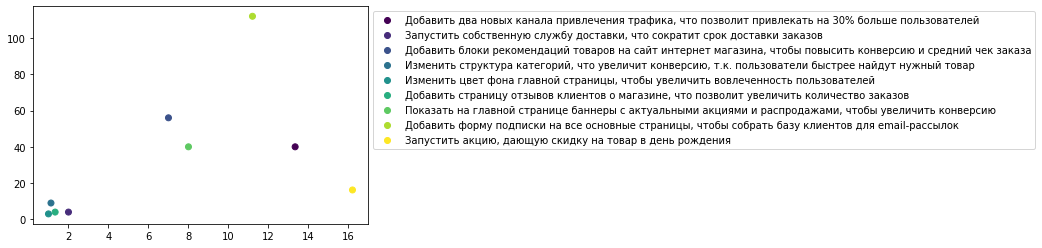

In [67]:
ax = plt.scatter(x = hypothesis ['ICE'],
                 y = hypothesis ['RICE'],
                 label = hypothesis['Hypothesis'],
                 c = np.linspace(0,1, num=len(hypothesis)))
plt.legend(loc = 'best',
           handles = ax.legend_elements()[0],
           labels=hypothesis['Hypothesis'].array,
           bbox_to_anchor=(1,0.5,0.5,0.5))
plt.show

#### Итог по шагу:
1) Параметр охвата (Reach) изменил топ приоритетности, т.к. он больше отражает именно колличественную величину клиентов, которые не зависят от дня в году.

2) Без параметра охвата первенство завоевывает акция в честь дня рождения.

3) Также без параметра охвата идея о "Добавлении двух новых канала привлечения трафика" занимает второе место.
    * Но при иcпользовании параметра охвата это место занимает идея о "Добавлении блоков рекомендаций товаров на сайте интернет магазина".
4) Неизменными остались гипотезы о "добавлении баннеров с актуальными акциями на главную страницу" и "идея с изменением цвета фона главной страницы". (4 гипотеза (о цвете) максимально неуверенная, т.к. косметический эффект могут и не заметить, поэтому эта идея осталась на последнем месте).


<a name="stage_3"></a>
## Анализ A/B-теста
[К оглавлению](#table_of_contents)

<a name="s_1"></a>
### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

In [68]:
#Нужно создать датафрейм.
#Чтобы это сделать нужно для orders и visitors сделать сводные таблицы сгруппировав по дате и группе
orders_cummulative = (orders
                      .pivot_table(index=['date', 'group'],
                                   aggfunc={'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}
                                  )
                      .sort_values(['date', 'group'])
                      .groupby(['group'])
                      .cumsum().reset_index())
visitors_cummulative = (visitors
                       .pivot_table(index=['date', 'group'],
                                   aggfunc={'visitors':'sum'}
                                   ) 
                       .sort_values(['date', 'group'])
                       .groupby(['group'])
                       .cumsum().reset_index()
                      )
#создам датафрейм cummulative
cummulative = orders_cummulative.join(visitors_cummulative[['visitors']])
#cummulative.head(10)
#можно сразу посчитать средний чек и конверсию
cummulative['average_check'] = cummulative['revenue'] / cummulative['transaction_id']
cummulative['conversion'] = cummulative['transaction_id'] / cummulative['visitors']
cummulative['conversion, %'] = (cummulative['conversion']*100).round(2)
cummulative.head(10)

,date,group,revenue,transaction_id,visitor_id,visitors,average_check,conversion,"conversion, %"
0,2019-08-01,A,148579,24,20,719,"6,190.79",0.03,3.34
1,2019-08-01,B,101217,21,20,713,"4,819.86",0.03,2.95
2,2019-08-02,A,242401,44,39,1338,"5,509.11",0.03,3.29
3,2019-08-02,B,266748,45,43,1294,"5,927.73",0.03,3.48
4,2019-08-03,A,354874,68,63,1845,"5,218.74",0.04,3.69
5,2019-08-03,B,380996,61,59,1803,"6,245.84",0.03,3.38
6,2019-08-04,A,425699,84,78,2562,"5,067.85",0.03,3.28
7,2019-08-04,B,489567,78,75,2573,"6,276.50",0.03,3.03
8,2019-08-05,A,549917,109,103,3318,"5,045.11",0.03,3.29
9,2019-08-05,B,581995,101,98,3280,"5,762.33",0.03,3.08


In [69]:
#Разделим по группам:
cummulative_group_A = cummulative.query('group=="A"')
cummulative_group_B = cummulative.query('group=="B"')
cummulative_group_A.head(10)


,date,group,revenue,transaction_id,visitor_id,visitors,average_check,conversion,"conversion, %"
0,2019-08-01,A,148579,24,20,719,"6,190.79",0.03,3.34
2,2019-08-02,A,242401,44,39,1338,"5,509.11",0.03,3.29
4,2019-08-03,A,354874,68,63,1845,"5,218.74",0.04,3.69
6,2019-08-04,A,425699,84,78,2562,"5,067.85",0.03,3.28
8,2019-08-05,A,549917,109,103,3318,"5,045.11",0.03,3.29
10,2019-08-06,A,598401,127,118,3985,"4,711.82",0.03,3.19
12,2019-08-07,A,740818,145,136,4629,"5,109.09",0.03,3.13
14,2019-08-08,A,837097,161,152,5239,"5,199.36",0.03,3.07
16,2019-08-09,A,1025603,177,166,5856,"5,794.37",0.03,3.02
18,2019-08-10,A,1236098,193,182,6262,"6,404.65",0.03,3.08


In [70]:
cummulative_group_B.head(10)

,date,group,revenue,transaction_id,visitor_id,visitors,average_check,conversion,"conversion, %"
1,2019-08-01,B,101217,21,20,713,"4,819.86",0.03,2.95
3,2019-08-02,B,266748,45,43,1294,"5,927.73",0.03,3.48
5,2019-08-03,B,380996,61,59,1803,"6,245.84",0.03,3.38
7,2019-08-04,B,489567,78,75,2573,"6,276.50",0.03,3.03
9,2019-08-05,B,581995,101,98,3280,"5,762.33",0.03,3.08
11,2019-08-06,B,824337,129,124,3935,"6,390.21",0.03,3.28
13,2019-08-07,B,1049671,153,148,4644,"6,860.59",0.03,3.29
15,2019-08-08,B,1270589,180,175,5298,"7,058.83",0.03,3.40
17,2019-08-09,B,1431401,205,199,5908,"6,982.44",0.03,3.47
19,2019-08-10,B,1539203,228,222,6277,"6,750.89",0.04,3.63


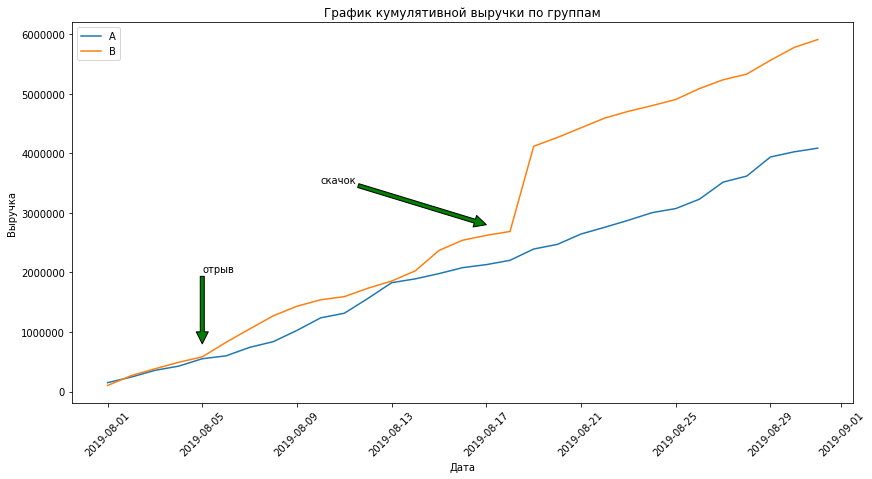

In [71]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(14, 7))
plt.plot(cummulative_group_A['date'], cummulative_group_A['revenue'], label='A')
plt.plot(cummulative_group_B['date'], cummulative_group_B['revenue'], label='B')
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()         

Здесь видно, что у группы В в  (17.08-21.08) периоде произошел резкий выброс - может дорогой заказ или заказы. Да и в целом, группа В больше приносила денег - их график лежит поверх графика группы А.

<a name="s_2"></a>
### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

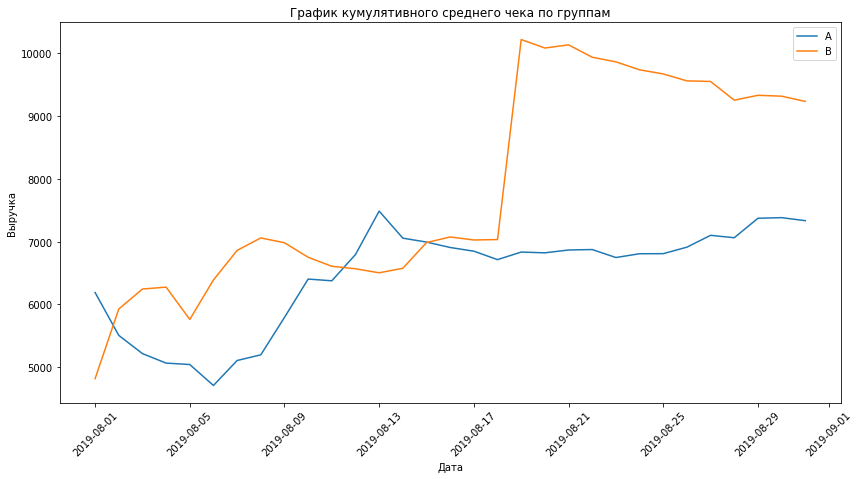

In [72]:
plt.figure(figsize=(14, 7))
plt.plot(cummulative_group_A['date'], cummulative_group_A['average_check'], label='A')
plt.plot(cummulative_group_B['date'], cummulative_group_B['average_check'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()         

Тут снова группа В лидирует, опять же срединный августовский выброс. Но здесь у группы В в сентябре идет спад. Интересен также лидирующий рост группы А 13.08 - большое количество товаров или несколько (сверх-)дорогих покупок повысили группу А.

<a name="s_3"></a>
### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

In [73]:
#нужно замержить две группы, чтобы удобнее высчитать изменения кумулятивного среднего чека группы B к группе A.
data_group= (cummulative_group_A[['date', 'average_check']].merge(cummulative_group_B[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))


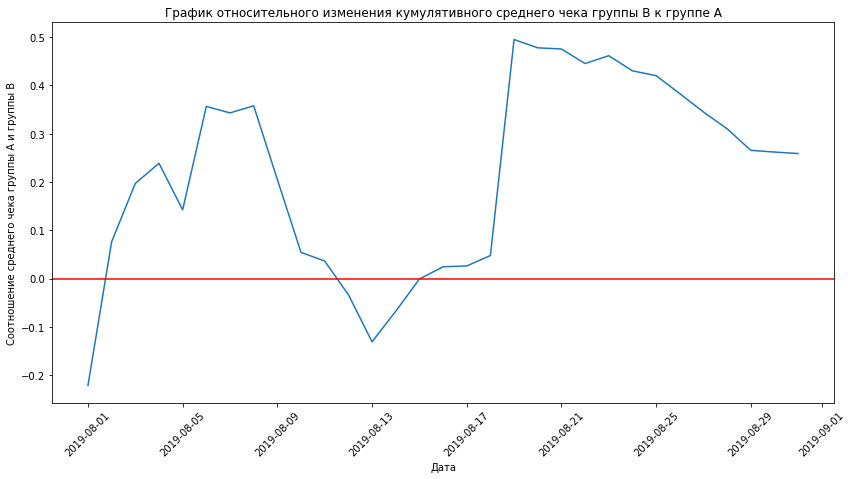

In [74]:
plt.figure(figsize=(14, 7))
plt.plot(data_group['date'], data_group['average_check_B'] / data_group['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.ylabel('Соотношение среднего чека группы А и группы В')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show()

Сильные колебания - во всем виноваты выбросы.

<a name="s_4"></a>
### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

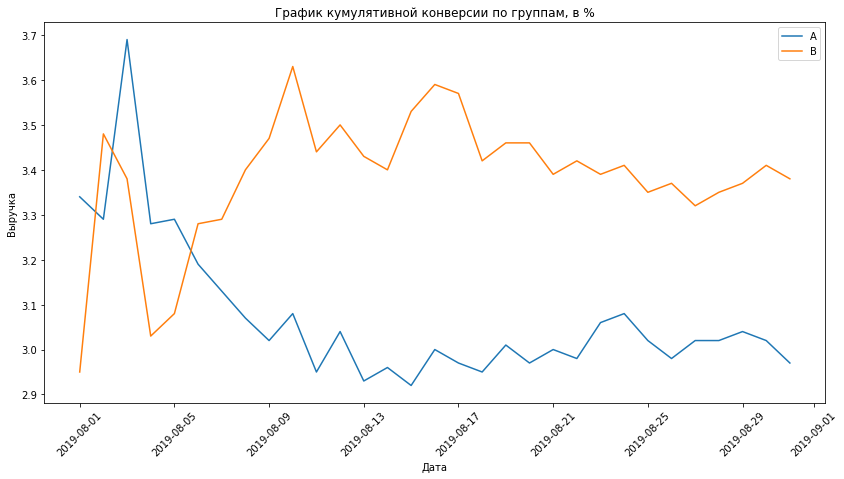

In [75]:
plt.figure(figsize=(14, 7))
plt.plot(cummulative_group_A['date'], cummulative_group_A['conversion, %'], label='A')
plt.plot(cummulative_group_B['date'], cummulative_group_B['conversion, %'], label='B')
plt.title('График кумулятивной конверсии по группам, в %')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()  

У группы В выраженная динамика с 01.08 - 05.08 - в районах 2.9% и 3.5%. Потом идет колеблющийся рост. Группа А "выстреливает" 01.08-05.08 с 3.3% до 3.7%, а потом резко идет на спад, но ниже 2.9. не падает - также отмечаются колебания.  

<a name="s_5"></a>
### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

In [76]:
#сделаю всё то же самое, что и для 3 задания
data_group2= (cummulative_group_A[['date', 'conversion, %']].merge(cummulative_group_B[['date', 'conversion, %']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))

In [77]:
data_group2.head(10)

,date,"conversion, %_A","conversion, %_B"
0,2019-08-01,3.34,2.95
1,2019-08-02,3.29,3.48
2,2019-08-03,3.69,3.38
3,2019-08-04,3.28,3.03
4,2019-08-05,3.29,3.08
5,2019-08-06,3.19,3.28
6,2019-08-07,3.13,3.29
7,2019-08-08,3.07,3.40
8,2019-08-09,3.02,3.47
9,2019-08-10,3.08,3.63


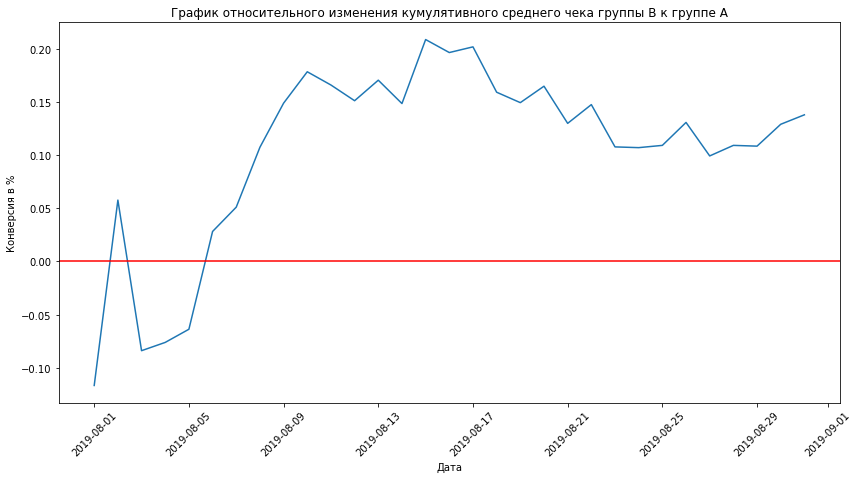

In [78]:
plt.figure(figsize=(14, 7))
plt.plot(data_group2['date'], data_group2['conversion, %_B'] / data_group2['conversion, %_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.ylabel('Конверсия в %')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show()

Снова виновны выбросы

<a name="s_6"></a>
### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

In [79]:
#Нужно создать датафрейм сгруппировав пользователей совершивших заказ с индетификаторами заказов:
order_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})

In [80]:
order_per_user.head(10)

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


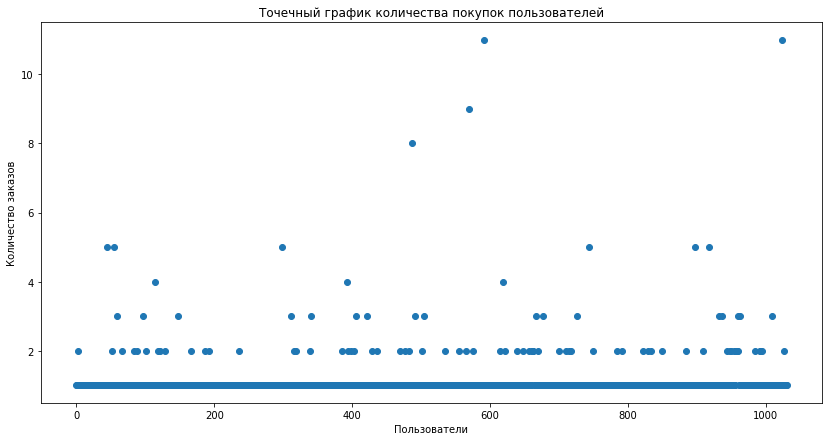

In [81]:
#строю точечный график:
plt.figure(figsize=(14, 7))
x_values = pd.Series(range(0,len(order_per_user['transaction_id'])))
plt.scatter(x_values, order_per_user['transaction_id'])
plt.title('Точечный график количества покупок пользователей')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

Подавляющее большинство совершают от 1 до 2 покупок стабильно. Но есть и настоящие шопоголики.

<a name="s_7"></a>
### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
[К оглавлению](#table_of_contents)

In [82]:
print(np.percentile(order_per_user['transaction_id'], [90, 95, 99])) 

[1. 2. 4.]


На 90 и 95 процентили, как я писал выше, приходится по 1-2 заказу, с 99 количество заказов удваивается.

<a name="s_8"></a>
### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

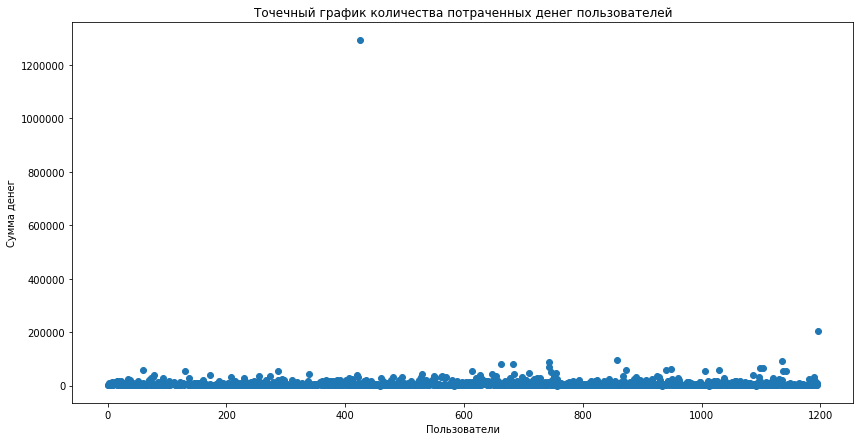

In [83]:
plt.figure(figsize=(14, 7))
x_values2 = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values2, orders['revenue'])
plt.title('Точечный график количества потраченных денег пользователей')
plt.ylabel('Сумма денег')
plt.xlabel('Пользователи')
plt.show()

И вот здесь есть два виновника выбросов: скорее всего самый высокий и искажает данные.

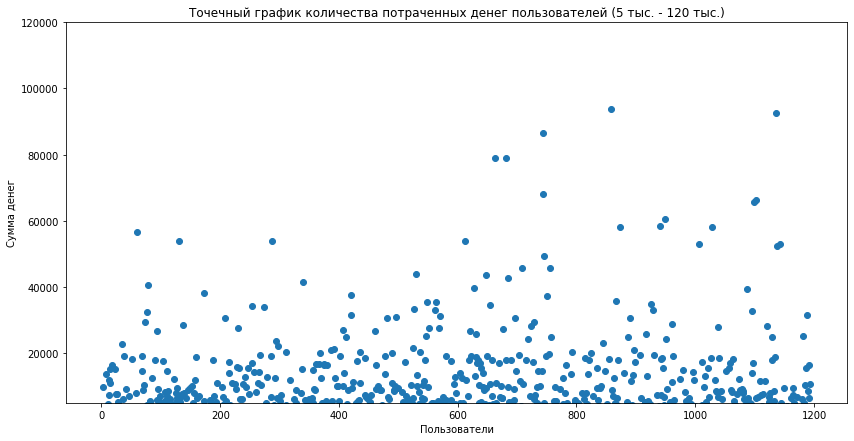

In [84]:
plt.figure(figsize=(14, 7))
x_values2 = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values2, orders['revenue'])
plt.title('Точечный график количества потраченных денег пользователей (5 тыс. - 120 тыс.)')
plt.ylabel('Сумма денег')
plt.xlabel('Пользователи')
plt.ylim([5000, 120000])
plt.show()

Здесь более детеально можно заметить, что начиная с 2 тыс. плотность трат падает, поэтмоу в целом можно "отсечь" тех, кто потратил свыше этой суммы. 

<a name="s_9"></a>
### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
[К оглавлению](#table_of_contents)

In [85]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


на 99 процентиле снова цифры вырастают в быстрой прогрессии.

<a name="s_10"></a>
### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

In [86]:
orders_2 = (orders.groupby('group').agg({'transaction_id':'count'}))
conversion= orders_2.join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['transaction_id'] / conversion['visitors']
conversion

,group,transaction_id,visitors,conversion
0,A,557,18736,0.03
1,B,640,18916,0.03


In [87]:
#Н0 - Коверсия группы А = Конверсии группы В
#Н1 - оверсия группы А НЕ= Конверсии группы В
#Для этого нужно использовать Z-критерий
alpha=0.05
purchases = np.array(conversion['transaction_id'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [88]:
conversion['statistical_significance'] = conversion['conversion'] * 1000
conversion

,group,transaction_id,visitors,conversion,statistical_significance
0,A,557,18736,0.03,29.73
1,B,640,18916,0.03,33.83


Статистическая значимость группы В оказалась выше группы А на 4,104927

In [89]:
print('Разница между группой В и группой A в статичстической значимости: {0:.2f} '.format (conversion[conversion['group']=='B']['statistical_significance'].mean() - conversion[conversion['group']=='A']['statistical_significance'].mean()))


Разница между группой В и группой A в статичстической значимости: 4.10 


<a name="s_11"></a>
### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

Т.к. есть выбросы нужно использовать Непараметрический тест Уилкоксона-Манна-Уитни.

In [90]:
#Н0 - вывод о различии сделать нельзя
#Н1 - разница статистически значима 
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],alternative = 'two-sided')
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [91]:
print('Средний чек группы А: {0:}' .format (orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {0:}' .format (orders[orders['group']=='B']['revenue'].mean()))
print('Разница между группой В и группой A: {0:.1f} '.format (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()))

Средний чек группы А: 7333.578096947936
Средний чек группы B: 9230.875
Разница между группой В и группой A: 1.3 


Действительно их разница несущесвтенна.

<a name="s_12"></a>
### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

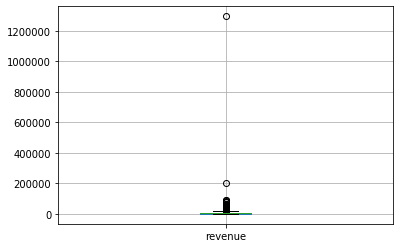

In [92]:
orders.boxplot(column=['revenue'])

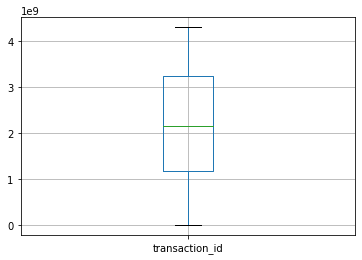

In [93]:
orders.boxplot(column=['transaction_id'])

Посмотря на боксплоты и на точечные диаграммы из задания 6 и 8, думаю, что нужно убрать пользователей, чьи покупки выше 20 тысяч.

In [94]:
clean_items= order_per_user[order_per_user['transaction_id'] >= 8]['visitor_id'].to_list()
clean_revenue = orders[orders['revenue'] > 20000]['visitor_id']
orders_clean = orders[~orders['visitor_id'].isin(clean_revenue)]
orders_clean = orders[~orders['visitor_id'].isin(clean_items)]

In [95]:
order_3 = (orders_clean.groupby('group').agg({'transaction_id':'count'}))
conversion_clear = order_3.join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()   
conversion_clear['conversion'] = conversion_clear['transaction_id'] / conversion_clear['visitors']
conversion_clear

,group,transaction_id,visitors,conversion
0,A,536,18736,0.03
1,B,622,18916,0.03


In [96]:
alpha=0.05
purchases = np.array(conversion_clear['transaction_id'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.01631488121365332
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [97]:
conversion_clear['statistical_significance'] = conversion_clear['conversion'] * 1000
conversion_clear

,group,transaction_id,visitors,conversion,statistical_significance
0,A,536,18736,0.03,28.61
1,B,622,18916,0.03,32.88


Также как и в сырых данных, между группой В и А есть значимая разница в 3,817701

In [98]:
print('Разница между группой В и группой A в статичстической значимости: {0:.2f} '.format (conversion_clear[conversion_clear['group']=='B']['statistical_significance'].mean() - conversion_clear[conversion_clear['group']=='A']['statistical_significance'].mean()))

Разница между группой В и группой A в статичстической значимости: 4.27 


<a name="s_13"></a>
### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
[К оглавлению](#table_of_contents)

Снова используем Непараметрический тест Уилкоксона-Манна-Уитни.

In [99]:
#Н0 - вывод о различии сделать нельзя
#Н1 - разница статистически значима 
alpha = 0.05
results = st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'],alternative='two-sided')
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.993391430640759
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [100]:
print('Средний чек группы А: {0:}' .format (orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {0:}' .format (orders_clean[orders_clean['group']=='B']['revenue'].mean()))
print('Разница между группой В и группой A: {0:.1f} '.format (orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()))

Средний чек группы А: 7334.055970149254
Средний чек группы B: 9106.932475884245
Разница между группой В и группой A: 1.2 


Разницы снова нет.

<a name="s_14"></a>
## Итог:
[К оглавлению](#table_of_contents)

1) Был проведен А/В тест интернет-магазина за период от 01.08.2019 по 01.09.2018.
2) При RICE и ICE было выявлено:
    1) Параметр охвата (Reach) изменил топ приоритетности, т.к. он больше отражает именно колличественную величину клиентов, которые не зависят от дня в году.

    2) Без параметра охвата первенство завоевывает акция в честь дня рождения.

    3) Также без параметра охвата идея о "Добавлении двух новых канала привлечения трафика" занимает второе место.

        * Но при иcпользовании параметра охвата это место занимает идея о "Добавлении блоков рекомендаций товаров на сайте интернет магазина".
    4) Неизменными остались гипотезы о "добавлении баннеров с актуальными акциями на главную страницу" и "идея с изменением цвета фона главной страницы". (4 гипотеза (о цвете) максимально неуверенная, т.к. косметический эффект могут и не заметить, поэтому эта идея осталась на последнем месте).
3) При построении графиков по кумулятивной выручки по группам и кумулятивного среднего чека по группам были выявлены сильные выбросы в середине августа.

4) Посмотрев на графики относительных изменений группы В к группам А отмечается сильный динамизм графиков.

5) На точечных графиках можно увидеть эти выбросы: 
    * я не счел количество покупок за выбросы, потому что люди могут совершать множество дешевых покупок.
    * Но если посмотреть в средней перспективе, то я убрал людей чтью покупки выше 20 тысяч, т.к. их было очень мало.
        * + я убрал посетителей, которые совершили больше 8 покупок, их было тоже мало, но убрав их, данные хорошо очистились
<a name="stage_4"></a>
## Тест можно завершить, ждать когда график встанет в стабильную горизонтальную линию не целесообразно     